## Fixed dictionary

### Create dictionary

Critical Note: The base signal used to construct the dictionary must comprise a number of samples that is a multiple of two.

Level 0:
  Node: , Data lenght: 512
Level 1:
  Node: a, Data lenght: 256
  Node: d, Data lenght: 256
Level 2:
  Node: aa, Data lenght: 128
  Node: ad, Data lenght: 128
  Node: da, Data lenght: 128
  Node: dd, Data lenght: 128
Level 3:
  Node: aaa, Data lenght: 64
  Node: aad, Data lenght: 64
  Node: ada, Data lenght: 64
  Node: add, Data lenght: 64
  Node: daa, Data lenght: 64
  Node: dad, Data lenght: 64
  Node: dda, Data lenght: 64
  Node: ddd, Data lenght: 64
Level 4:
  Node: aaaa, Data lenght: 32
  Node: aaad, Data lenght: 32
  Node: aada, Data lenght: 32
  Node: aadd, Data lenght: 32
  Node: adaa, Data lenght: 32
  Node: adad, Data lenght: 32
  Node: adda, Data lenght: 32
  Node: addd, Data lenght: 32
  Node: daaa, Data lenght: 32
  Node: daad, Data lenght: 32
  Node: dada, Data lenght: 32
  Node: dadd, Data lenght: 32
  Node: ddaa, Data lenght: 32
  Node: ddad, Data lenght: 32
  Node: ddda, Data lenght: 32
  Node: dddd, Data lenght: 32
Level 5:
  Node: aaaaa, Data lenght: 16
  No

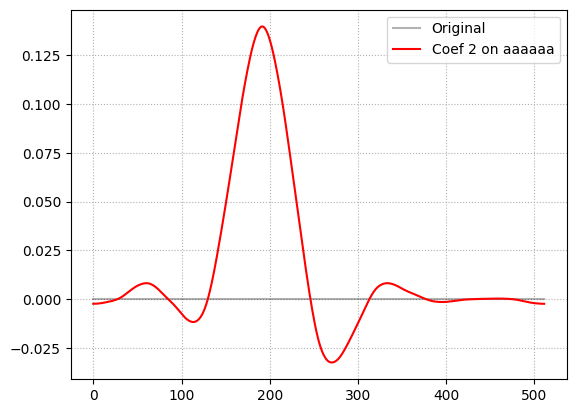

In [2]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Initialize
signal = 0*np.linspace(0, 1, 512)
wavelet = 'sym8'
max_level = 6

# Tree wavelet packets
wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, mode='periodization', maxlevel=max_level)
# Level Nodes
for level in range(max_level+1):
    nodes = wp.get_level(level, order='natural')
    print(f"Level {level}:")
    for node in nodes:
        print(f"  Node: {node.path}, Data lenght: {len(node.data)}")


# Example
nodo_path = 'aaaaaa'  # Ej: Level 3
indice_coef = 2    # Number Coeficient to keep  


# Modify tree
# --------------------------
# Set all coefficients to zero except the selected one
for node in wp.get_leaf_nodes():
    if node.path == nodo_path:
        new_data = np.zeros_like(node.data)
        new_data[indice_coef] = 1  # Keep the coefficient
        node.data = new_data
    else:
        node.data *= 0  # Zero the other

# Rebuild the signal
signal_rec = wp.reconstruct()

plt.plot(signal, 'k', alpha=0.3, label='Original')
plt.plot(signal_rec, 'r', label=f'Coef {indice_coef} on {nodo_path}')
plt.legend()
plt.grid(ls=':')
plt.show()

### Function

In [3]:
def fixed_wpt_dictionary(wavelet='sym8', max_level=6, samples=512):
    # Base signal
    signal = np.zeros(samples)

    # Base tree
    wp_original = pywt.WaveletPacket(data=signal, wavelet=wavelet, mode='periodization', maxlevel=max_level)

    dictionary = []
    dictionary_columns = []

    for level in range(1, max_level + 1):
        nodes = wp_original.get_level(level, order='natural')
        print(f"Nivel {level}:")
        for node in nodes:
            print(f"  Nodo: {node.path}, longitud: {len(node.data)}")
            dictionary_columns.append([node.path, len(node.data)])
            for i in range(len(node.data)):
                # New Tree
                wp_temp = pywt.WaveletPacket(data=None, wavelet=wavelet, mode='periodization', maxlevel=max_level)

                # Zero Coefficients
                for other_node in wp_original.get_level(level, order='natural'):
                    wp_temp[other_node.path] = np.zeros_like(other_node.data)

                # One coefficient
                impulse = np.zeros_like(node.data)
                impulse[i] = 1
                wp_temp[node.path] = impulse

                # Rebuild signal (atom)
                signal_rec = wp_temp.reconstruct(update=False)


                # Normalize L2
                norm = np.linalg.norm(signal_rec)
                if norm > 0:
                    signal_rec /= norm

                dictionary.append(signal_rec)

    return dictionary_columns,np.array(dictionary)

dictionary_columns, dictionary = fixed_wpt_dictionary()


Nivel 1:
  Nodo: a, longitud: 256
  Nodo: d, longitud: 256
Nivel 2:
  Nodo: aa, longitud: 128
  Nodo: ad, longitud: 128
  Nodo: da, longitud: 128
  Nodo: dd, longitud: 128
Nivel 3:
  Nodo: aaa, longitud: 64
  Nodo: aad, longitud: 64
  Nodo: ada, longitud: 64
  Nodo: add, longitud: 64
  Nodo: daa, longitud: 64
  Nodo: dad, longitud: 64
  Nodo: dda, longitud: 64
  Nodo: ddd, longitud: 64
Nivel 4:
  Nodo: aaaa, longitud: 32
  Nodo: aaad, longitud: 32
  Nodo: aada, longitud: 32
  Nodo: aadd, longitud: 32
  Nodo: adaa, longitud: 32
  Nodo: adad, longitud: 32
  Nodo: adda, longitud: 32
  Nodo: addd, longitud: 32
  Nodo: daaa, longitud: 32
  Nodo: daad, longitud: 32
  Nodo: dada, longitud: 32
  Nodo: dadd, longitud: 32
  Nodo: ddaa, longitud: 32
  Nodo: ddad, longitud: 32
  Nodo: ddda, longitud: 32
  Nodo: dddd, longitud: 32
Nivel 5:
  Nodo: aaaaa, longitud: 16
  Nodo: aaaad, longitud: 16
  Nodo: aaada, longitud: 16
  Nodo: aaadd, longitud: 16
  Nodo: aadaa, longitud: 16
  Nodo: aadad, longit

(3072, 512)
[['a', 256], ['d', 256], ['aa', 128], ['ad', 128], ['da', 128], ['dd', 128], ['aaa', 64], ['aad', 64], ['ada', 64], ['add', 64], ['daa', 64], ['dad', 64], ['dda', 64], ['ddd', 64], ['aaaa', 32], ['aaad', 32], ['aada', 32], ['aadd', 32], ['adaa', 32], ['adad', 32], ['adda', 32], ['addd', 32], ['daaa', 32], ['daad', 32], ['dada', 32], ['dadd', 32], ['ddaa', 32], ['ddad', 32], ['ddda', 32], ['dddd', 32], ['aaaaa', 16], ['aaaad', 16], ['aaada', 16], ['aaadd', 16], ['aadaa', 16], ['aadad', 16], ['aadda', 16], ['aaddd', 16], ['adaaa', 16], ['adaad', 16], ['adada', 16], ['adadd', 16], ['addaa', 16], ['addad', 16], ['addda', 16], ['adddd', 16], ['daaaa', 16], ['daaad', 16], ['daada', 16], ['daadd', 16], ['dadaa', 16], ['dadad', 16], ['dadda', 16], ['daddd', 16], ['ddaaa', 16], ['ddaad', 16], ['ddada', 16], ['ddadd', 16], ['dddaa', 16], ['dddad', 16], ['dddda', 16], ['ddddd', 16], ['aaaaaa', 8], ['aaaaad', 8], ['aaaada', 8], ['aaaadd', 8], ['aaadaa', 8], ['aaadad', 8], ['aaadda', 8]

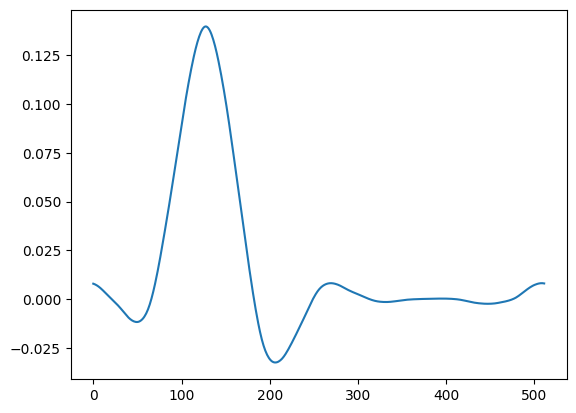

In [4]:
print(dictionary.shape)
print(dictionary_columns)

# Plot example atom
plt.figure()
plt.plot(dictionary[2561])
plt.show()

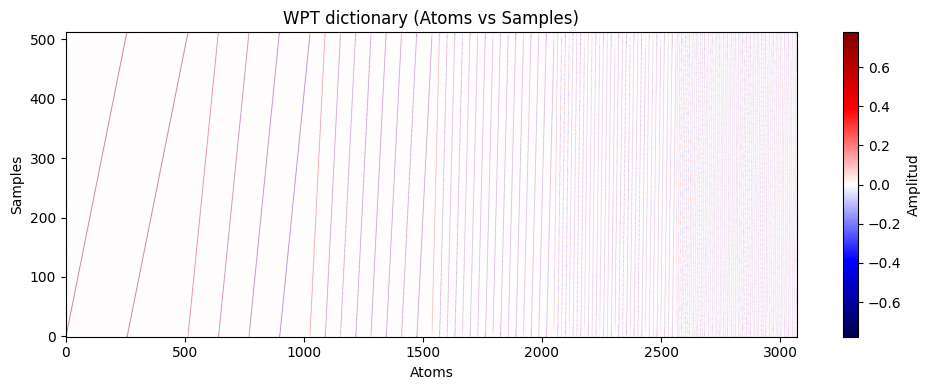

In [5]:
plt.figure(figsize=(10, 4))
plt.imshow(dictionary.T, aspect='auto', cmap='seismic', origin='lower')
plt.colorbar(label='Amplitud')
plt.xlabel('Atoms')
plt.ylabel('Samples')
plt.title('WPT dictionary (Atoms vs Samples)')
plt.tight_layout()
plt.show()

### Señales de prueba

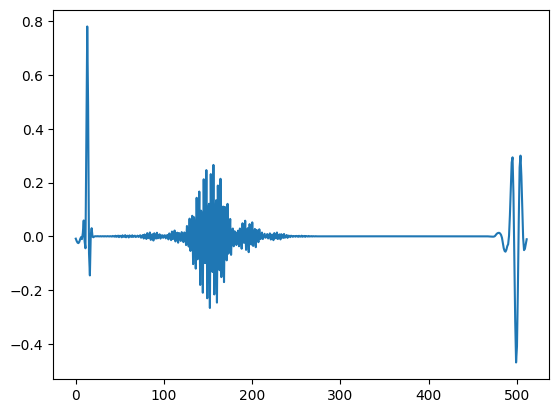

In [6]:
# Initialize
import random


s1 = [random.uniform(0,10)*random.randint(0, 1) for _ in range(dictionary.shape[0])]

s1 = np.zeros_like(s1)
s1[6] = 1
s1[1150] = 1
s1[2500] = 1

signal_test = np.zeros_like(dictionary.shape[1])
signal_coef = []

for i in range(len(s1)):
    signal_test = signal_test + s1[i]*dictionary[i]


# t = np.linspace(0,1,512)
# signal_test = np.sin(2*np.pi*t)+np.cos(20*np.pi*t)
# signal_test = signal_test - np.mean(signal_test)

plt.figure()
plt.plot(signal_test)
plt.show()



### OMP (Orthogonal matchin pursuit)

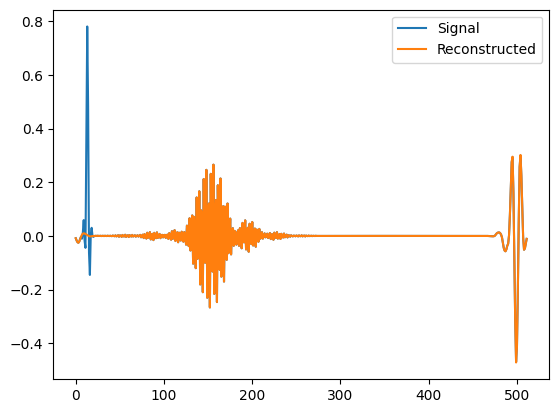

[0. 0. 0. ... 0. 0. 0.]


In [9]:
from sklearn.linear_model import OrthogonalMatchingPursuit

# Model config
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=2)
omp.fit(dictionary.T, signal_test)

# Non nulls coefficients
coeficients = omp.coef_

reconstructed_signal = dictionary.T @ coeficients

plt.figure()
plt.plot(signal_test, label='Signal')
plt.plot(reconstructed_signal, label='Reconstructed')
plt.legend()
plt.show()

print(coeficients)

### OMP and CV

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_omp.py:445: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_omp.py:445: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_omp.py:445: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_omp.py:445: RuntimeWarning: Orthogonal mat

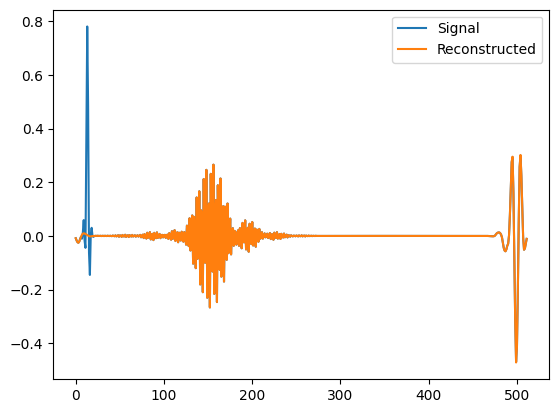

[0. 0. 0. ... 0. 0. 0.]


In [8]:
from sklearn.linear_model import OrthogonalMatchingPursuitCV
import matplotlib.pyplot as plt

# Crear el modelo con validación cruzada
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(dictionary.T, signal_test)

# Obtener los coeficientes no nulos
coefficients = omp_cv.coef_

# Reconstruir la señal
reconstructed_signal = dictionary.T @ coefficients

# Graficar señal original vs reconstruida
plt.figure()
plt.plot(signal_test, label='Signal')
plt.plot(reconstructed_signal, label='Reconstructed')
plt.legend()
plt.show()

# Imprimir coeficientes
print(coefficients)
